subplots
https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html#plt.subplot:-Simple-Grids-of-Subplots

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

/tmp/ipykernel_232/2968504248.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
/tmp/ipykernel_232/2968504248.py:29: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
/tmp/ipykernel_232/2968504248.py:76: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector
/tmp/ipykernel_232/2968504248.py:76: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector


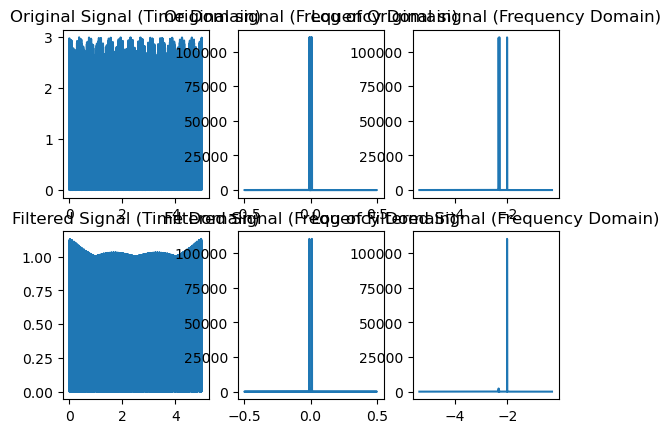

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Generate a test signal with high-frequency noise
seconds = 5
samples_total = seconds*44100 # typical sample-frequency is 44.1kHz, so 5 seconds of audio
t = np.linspace(0, seconds, samples_total) # 0 to 5 second, 10,000 samples per second
signal = np.sin(206.591*(2*np.pi)*t) + np.sin(220.00*(2*np.pi)*t) + np.cos(432.0*(2*np.pi)*t) # k = 2.69, 40, 500


# Plot the original signal in the time domain
plt.subplot(2, 3, 1)
plt.plot(t, np.abs(signal))
plt.title('Original Signal (Time Domain)')

# Perform the Fourier transform to convert the signal to the frequency domain
freq = np.fft.fftfreq(len(t))
fft_signal = np.fft.fft(signal)

# Plot the signal in the frequency domain
plt.subplot(2, 3, 2)
plt.plot(freq, np.abs(fft_signal)) # abs gets magnitude of the complex vector
plt.title('Original signal (Frequency Domain)')

# Plot the log of the frequency domain
plt.subplot(2, 3, 3)
plt.plot(np.log10(freq), np.abs(fft_signal)) # abs gets magnitude of the complex vector
plt.title('Log of Original signal (Frequency Domain)')


# Create a high-frequency filter that removes all frequencies above 50 Hz
# Recall, 1 Hz equals 1 cycle persecond and we are doing a rate of 1000 samples per second.
#
# filter out the freqs we do not want in the final output
k1_filter = 220.00
k2_filter = 206.591
freq_remove1 = (k1_filter/(samples_total/seconds)) # normalize about [-0.5, 0.5]
freq_remove2 = (k2_filter/(samples_total/seconds)) 
err_range = 0.000005 # plus or minus


freq_remove1_cutoff = np.ones_like(freq)
freq_remove2_cutoff = np.ones_like(freq)


# remove the following frequencies plus or minus a certain error range 
freq_remove1_cutoff[np.logical_and(np.abs(freq) > freq_remove1 - err_range, np.abs(freq) < freq_remove1 + err_range)] = 0
freq_remove2_cutoff[np.logical_and(np.abs(freq) > freq_remove2 - err_range, np.abs(freq) < freq_remove2 + err_range)] = 0

# zeros out the freq we want to remove
full_freq_filter = np.logical_and(freq_remove1_cutoff, freq_remove2_cutoff)


# Apply the filter to the Fourier transformed signal
filtered_fft = fft_signal * full_freq_filter


# Perform an inverse Fourier transform to convert the signal back to the time domain
filtered_signal = np.fft.ifft(filtered_fft)


# Plot the filtered signal in the time domain
plt.subplot(2, 3, 4)
plt.plot(t, np.abs(filtered_signal))
plt.title('Filtered Signal (Time Domain)')

# Plot the filtered signal in the frequency domain
plt.subplot(2, 3, 5)
plt.plot(freq, np.abs(filtered_fft))
plt.title('Filtered Signal (Frequency Domain)')

# Plot the log of the frequency domain
plt.subplot(2, 3, 6)
plt.plot(np.log10(freq), np.abs(filtered_fft)) # abs gets magnitude of the complex vector
plt.title('Log of Filtered Signal (Frequency Domain)')

plt.show()


## Lets hear it!

In [3]:
import IPython as ip

audio_channel_1 = signal
audio_channel_2 = filtered_signal

# data needs to be a 2d numpy array for each channel, only 1 channel here
data = np.array([audio_channel_1])

# Plays at a typical rate
ip.display.Audio(audio_channel_1, rate=44100)

/home/tyler/anaconda3/envs/PyTorchCourse/lib/python3.9/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


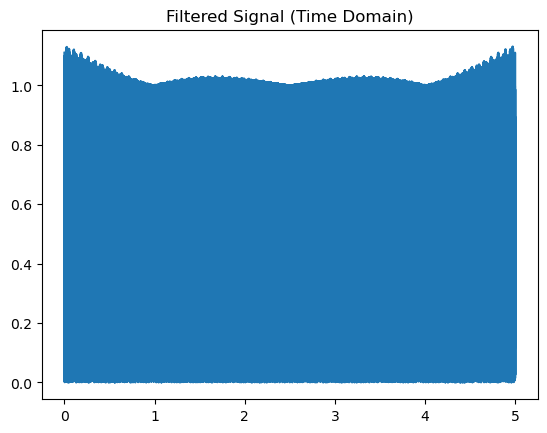

In [4]:
%matplotlib inline

# Plot the filtered signal in the time domain
plt.subplot(111)
plt.plot(t, np.abs(filtered_signal))
plt.title('Filtered Signal (Time Domain)')



ip.display.Audio(audio_channel_2, rate=44100)

### These would be the same waves should we have an infinite amount of samples. But we are using a sample rate of 44 kHz, and therefore this discrepency from the filtered inverse FFT vs the pure tone is being caused by the Gibbs phenomenon.

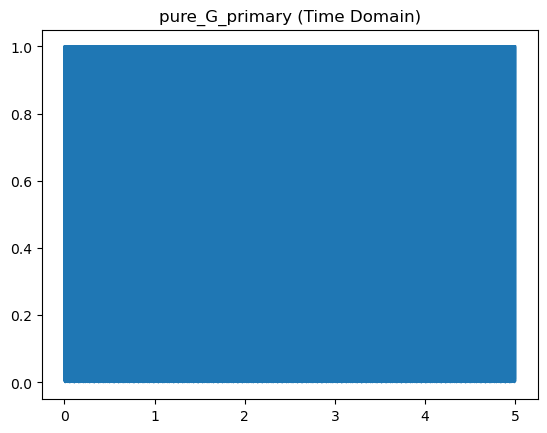

In [35]:
%matplotlib inline

pure_G_primary = np.cos(220*(2*np.pi)*t) 


plt.subplot(111)
plt.plot(t, np.abs(pure_G_primary))
plt.title('pure_G_primary (Time Domain)')


ip.display.Audio(np.abs(pure_G_primary), rate=44100)

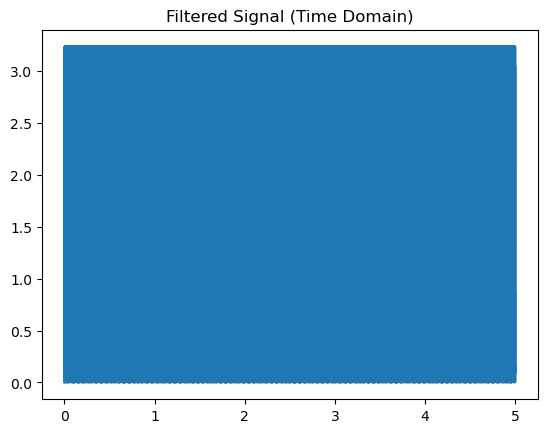

In [45]:
# harmonic wave
freq_0 = 261.625565
freq_1 = freq_0*2
freq_2 = freq_0*3
freq_3 = freq_0*4

pure_G_primary = np.cos(freq_0/2*(2*np.pi)*t) 

harmonic_waves = np.sin(freq_0/2*(2*np.pi)*t) + np.sin(freq_1/2*(2*np.pi)*t) + np.sin(freq_2/2*(2*np.pi)*t) + np.sin(freq_3/2*(2*np.pi)*t)  

# write a function that creates a harmonic wave of n


# Plot the pure signal
plt.subplot(111)
plt.plot(t, np.abs(harmonic_waves))
plt.title('Filtered Signal (Time Domain)')



ip.display.Audio(np.abs(harmonic_waves), rate=44100)